# Workplace Dynamics: How Location Affects Sleep and Stress

## Objective

### "**Do people who work from home have better quality of sleep and are less prone to stress?**"

This project analyzes **the relationship between work location and sleep quality among employees**, specifically investigating whether those who work from home experience **better sleep quality** and **lower stress levels** compared to their office-based counterparts.The analysis is driven by the **rise in remote work since the COVID-19 pandemic**, aiming to understand its impact on sleep and stress.

Additionally, a comprehensive dataset will be utilized, encompassing demographic factors, job roles, work-life balance ratings, stress levels, and access to mental health resources. The ultimate goal is to provide valuable insights into the effects of **remote work on employee well-being**.

## Goals

1. **Analyze the Impact of Work Location on Sleep Quality**: 
   To determine how working from home versus in the office affects employees' sleep quality, considering various demographic and job-related factors.

2. **Explore the Link Between Sleep Quality and Stress Levels**: 
   To assess the relationship between sleep quality and stress levels, examining whether better sleep correlates with lower stress across different employee groups.

3. **Identify Departments with High Stress Levels**: 
   To investigate the stress levels across different departments, aiming to identify any departments with particularly high stress and explore the contributing factors.
4. **Determine Effective Strategies for Reducing Stress Levels Across Different Industries**:
   To explore actionable measures that can be implemented to lower stress levels in various sectors, enhancing overall employee well-being.

## About the Dataset

- **Dataset Name**: Remote Work and Mental Health
- **Source**: Kaggle.com
- **License**: Apache 2.0
- **Structure**: 20 columns and 5,000 rows
- **Format**: CSV

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

In [73]:
data = pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv')
data

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,NaN,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

In [75]:
data.duplicated().sum()

0

In [76]:
data.isnull().sum()

Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64

In [77]:
data.fillna('None', inplace=True)
data

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,None,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,None,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,None,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,None,Average,Africa
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,None,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            5000 non-null   object
 12  Access

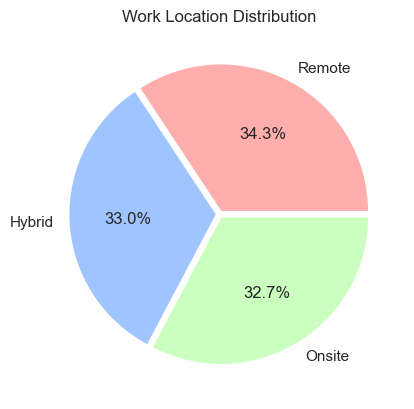

In [79]:
work_location_counts = data['Work_Location'].value_counts()
explode = [0.02] * 3
colors = ['#ffadad', '#a0c4ff','#caffbf']
plt.pie(work_location_counts, labels=work_location_counts.index, autopct='%1.1f%%', explode=explode, colors=colors)
plt.title('Work Location Distribution')

plt.show()

In [80]:
data = data[data['Work_Location'] != 'Hybrid']
data

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,None,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,None,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
6,EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,7,3,Low,Anxiety,Yes,Decrease,5,Neutral,3,Daily,Poor,Asia
7,EMP0008,42,Non-binary,Data Scientist,Manufacturing,6,Onsite,54,7,3,Medium,Depression,No,Decrease,5,Satisfied,4,None,Average,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4990,EMP4991,58,Prefer not to say,Project Manager,Consulting,10,Onsite,45,10,1,High,None,Yes,Increase,5,Unsatisfied,3,None,Poor,Africa
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,None,Average,Africa
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,None,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3351 entries, 1 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        3351 non-null   object
 1   Age                                3351 non-null   int64 
 2   Gender                             3351 non-null   object
 3   Job_Role                           3351 non-null   object
 4   Industry                           3351 non-null   object
 5   Years_of_Experience                3351 non-null   int64 
 6   Work_Location                      3351 non-null   object
 7   Hours_Worked_Per_Week              3351 non-null   int64 
 8   Number_of_Virtual_Meetings         3351 non-null   int64 
 9   Work_Life_Balance_Rating           3351 non-null   int64 
 10  Stress_Level                       3351 non-null   object
 11  Mental_Health_Condition            3351 non-null   object
 12  Access_to_M

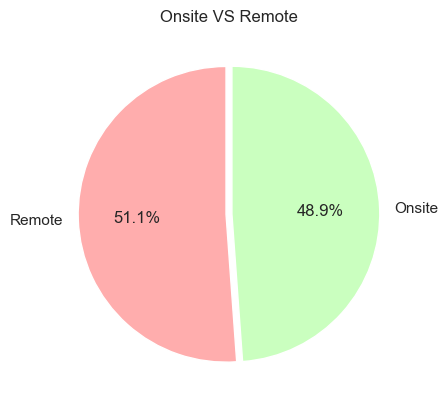

In [82]:
ratio_work_location = data['Work_Location'].value_counts()
colors = ['#ffadad', '#caffbf']
explode = [0.02] * 2
plt.pie(ratio_work_location, labels=ratio_work_location.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.title('Onsite VS Remote')
plt.show()

The dataset exhibits **a balanced distribution among onsite, remote, and hybrid work arrangements**. However, for the purposes of this project, I have chosen to exclude the hybrid data to concentrate specifically on the distinct experiences of onsite and remote employees. Furthermore, the dataset is free of null values and duplicate entries.

In [83]:
data = data[data['Work_Location'] != 'Hybrid']
data

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,None,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,None,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
6,EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,7,3,Low,Anxiety,Yes,Decrease,5,Neutral,3,Daily,Poor,Asia
7,EMP0008,42,Non-binary,Data Scientist,Manufacturing,6,Onsite,54,7,3,Medium,Depression,No,Decrease,5,Satisfied,4,None,Average,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4990,EMP4991,58,Prefer not to say,Project Manager,Consulting,10,Onsite,45,10,1,High,None,Yes,Increase,5,Unsatisfied,3,None,Poor,Africa
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,None,Average,Africa
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,None,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia


In [84]:
data.describe()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000
mean,40.969860,17.710236,39.628768,7.698299,2.965383,2.986571,3.025067
std,11.251746,9.982666,11.822218,4.625432,1.410196,1.394916,1.385414
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000
25%,31.000000,9.000000,29.000000,4.000000,2.000000,2.000000,2.000000
50%,41.000000,18.000000,39.000000,8.000000,3.000000,3.000000,3.000000
75%,51.000000,26.000000,50.000000,12.000000,4.000000,4.000000,4.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,5.000000,5.000000


In [85]:
data['Industry'].unique()

array(['IT', 'Finance', 'Consulting', 'Manufacturing', 'Retail',
       'Healthcare', 'Education'], dtype=object)

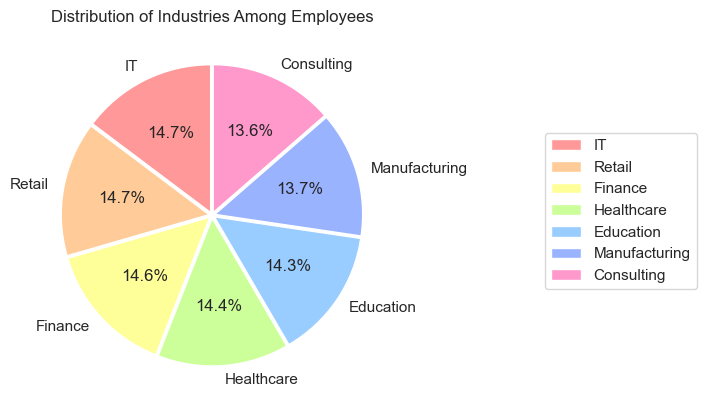

In [86]:
industry_ratio = data['Industry'].value_counts()
explode = [0.02] * 7
colors = ['#ff9999', '#ffcc99', '#ffff99', '#ccff99', '#99ccff', '#99b3ff', '#ff99cc']
plt.pie(industry_ratio, labels=industry_ratio.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.title('Distribution of Industries Among Employees')
plt.legend(loc=(1.4, 0.3))
plt.show()

Furthermore, the dataset is **evenly represented across various industries**, reflecting diverse employee experiences.  
This balanced representation can provide a more comprehensive analysis, helping us understand how industry context may influence work location, sleep quality, and employee stress levels.

In [87]:
data['Mental_Health_Condition'].unique()

array(['Anxiety', 'Depression', 'None', 'Burnout'], dtype=object)

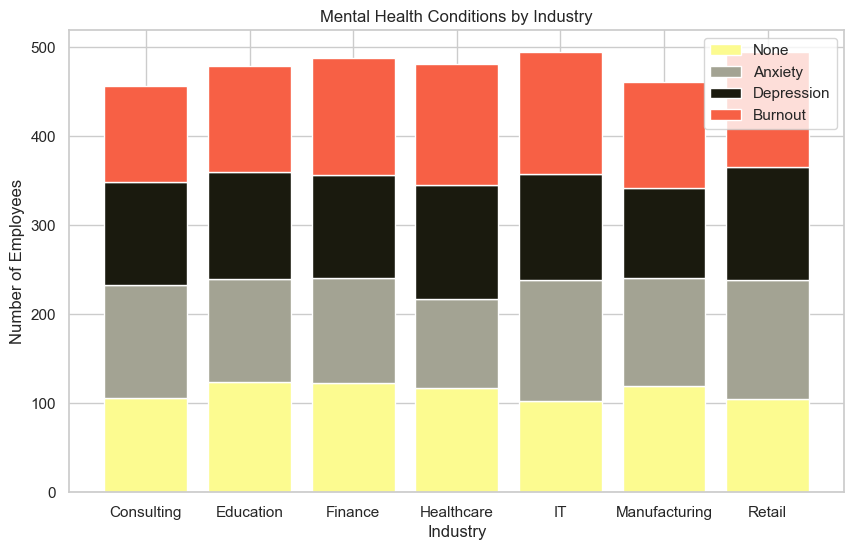

In [88]:
plt.figure(figsize=(10, 6))
industry_mental_health = data.groupby(['Industry', 'Mental_Health_Condition']).size().unstack(fill_value=0)

industries = industry_mental_health.index
index = np.arange(len(industries))

none = industry_mental_health.get('None', 0)
anxiety = industry_mental_health.get('Anxiety', 0)
depression = industry_mental_health.get('Depression', 0)
burnout = industry_mental_health.get('Burnout', 0)

plt.bar(index, none, label='None', color='#fcfb90')         
plt.bar(index, anxiety, bottom=none, label='Anxiety', color='#a3a393') 
plt.bar(index, depression, bottom=none + anxiety, label='Depression', color='#1a1a0e')  
plt.bar(index, burnout, bottom=none + anxiety + depression, label='Burnout', color='#f76045')

plt.xlabel('Industry')
plt.ylabel('Number of Employees')
plt.title('Mental Health Conditions by Industry')
plt.xticks(index, industries) 
plt.legend()

plt.show()

In [89]:
industry_mental_health

Mental_Health_Condition,Anxiety,Burnout,Depression,None
Industry,,,,
Consulting,127,108,115,106
Education,115,119,120,124
Finance,117,132,116,123
Healthcare,100,136,128,117
IT,136,137,119,102
Manufacturing,122,119,100,119
Retail,133,129,127,105


In [90]:
industry_mental_health['Total'] = industry_mental_health['Anxiety'] + industry_mental_health['Burnout'] + industry_mental_health['Depression'] + industry_mental_health['None']
industry_mental_health

Mental_Health_Condition,Anxiety,Burnout,Depression,None,Total
Industry,,,,,
Consulting,127,108,115,106,456
Education,115,119,120,124,478
Finance,117,132,116,123,488
Healthcare,100,136,128,117,481
IT,136,137,119,102,494
Manufacturing,122,119,100,119,460
Retail,133,129,127,105,494


In [91]:
industry_mental_health['Stress Free Percentage'] = round(industry_mental_health['None'] / industry_mental_health['Total'], 4)
industry_mental_health

Mental_Health_Condition,Anxiety,Burnout,Depression,None,Total,Stress Free Percentage
Industry,,,,,,
Consulting,127,108,115,106,456,0.2325
Education,115,119,120,124,478,0.2594
Finance,117,132,116,123,488,0.2520
Healthcare,100,136,128,117,481,0.2432
IT,136,137,119,102,494,0.2065
Manufacturing,122,119,100,119,460,0.2587
Retail,133,129,127,105,494,0.2126


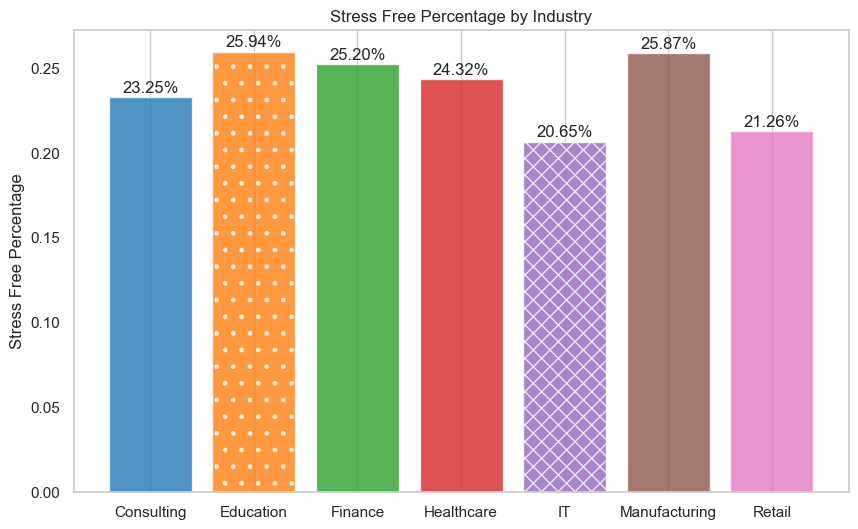

In [254]:
plt.figure(figsize=(10, 6))

categories = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
bars = plt.bar(industry_mental_health.index, industry_mental_health['Stress Free Percentage'],
               color=plt.cm.tab10(np.arange(len(categories))), alpha=0.8)

for idx, rect in enumerate(bars):
    plt.text(idx, rect.get_height() + 0.003,
             f'{industry_mental_health["Stress Free Percentage"].iloc[idx]:.2%}',
             ha='center')

bars[1].set_hatch('.')
bars[4].set_hatch('xx')
plt.ylabel('Stress Free Percentage')
plt.title('Stress Free Percentage by Industry')
plt.grid(axis='y')
plt.show()

One noticeable observation from the chart is that the **IT department shows the lowest percentage of employees reporting a stress-free experience, at 20.65%**. This finding underscores potential challenges within the industry that may impact employee well-being. Ultimately, I will investigate the factors contributing to the high-stress levels commonly experienced within IT departments.

## Data Cleaning

In [103]:
data['Stress_Level'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [104]:
data['Stress_Level'].replace({'Low': 1, 'Medium': 5, 'High': 10}, inplace=True)

In [105]:
data['Sleep_Quality'].unique()

array(['Good', 'Poor', 'Average'], dtype=object)

In [106]:
data['Sleep_Quality'].replace({'Poor':1, 'Average':5, 'Good':10}, inplace=True)

In [107]:
data['Physical_Activity'].unique()

array(['Weekly', 'None', 'Daily'], dtype=object)

In [108]:
data['Physical_Activity'].replace({'None':0, 'Weekly':5, 'Daily':10}, inplace=True)

In [109]:
data.describe()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Social_Isolation_Rating,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality
count,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000
mean,40.969860,17.710236,39.628768,7.698299,2.965383,5.363175,2.986571,3.025067,5.011937,5.333035
std,11.251746,9.982666,11.822218,4.625432,1.410196,3.677889,1.394916,1.385414,4.046355,3.687993
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,31.000000,9.000000,29.000000,4.000000,2.000000,1.000000,2.000000,2.000000,0.000000,1.000000
50%,41.000000,18.000000,39.000000,8.000000,3.000000,5.000000,3.000000,3.000000,5.000000,5.000000
75%,51.000000,26.000000,50.000000,12.000000,4.000000,10.000000,4.000000,4.000000,10.000000,10.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,10.000000,5.000000,5.000000,10.000000,10.000000


In [110]:
data.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,5,Anxiety,No,Increase,3,Satisfied,2,5,10,Asia
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,10,Depression,Yes,Increase,3,Unsatisfied,3,0,1,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,10,None,Yes,Decrease,3,Unsatisfied,3,5,5,North America
6,EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,7,3,1,Anxiety,Yes,Decrease,5,Neutral,3,10,1,Asia
7,EMP0008,42,Non-binary,Data Scientist,Manufacturing,6,Onsite,54,7,3,5,Depression,No,Decrease,5,Satisfied,4,0,5,North America


## 1. Correlation between Work Location and Sleep Quality

In [111]:
data.groupby('Work_Location')

In [112]:
onsite = data.groupby('Work_Location').get_group('Onsite')
onsite.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,10,Depression,Yes,Increase,3,Unsatisfied,3,0,1,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,10,None,Yes,Decrease,3,Unsatisfied,3,5,5,North America
7,EMP0008,42,Non-binary,Data Scientist,Manufacturing,6,Onsite,54,7,3,5,Depression,No,Decrease,5,Satisfied,4,0,5,North America
16,EMP0017,33,Prefer not to say,HR,Education,3,Onsite,52,9,2,5,None,No,No Change,1,Satisfied,1,5,10,Africa
17,EMP0018,45,Non-binary,Data Scientist,Consulting,20,Onsite,37,8,3,1,Burnout,Yes,Decrease,5,Neutral,5,5,10,Europe


In [113]:
remote = data.groupby('Work_Location').get_group('Remote')
remote.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,5,Anxiety,No,Increase,3,Satisfied,2,5,10,Asia
6,EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,7,3,1,Anxiety,Yes,Decrease,5,Neutral,3,10,1,Asia
10,EMP0011,33,Non-binary,Software Engineer,Finance,17,Remote,48,3,3,10,None,Yes,Decrease,4,Satisfied,2,5,5,Oceania
12,EMP0013,40,Female,Marketing,Consulting,1,Remote,21,7,2,10,Depression,Yes,Decrease,2,Neutral,1,5,10,Europe
14,EMP0015,36,Prefer not to say,Project Manager,Retail,23,Remote,59,11,3,10,Anxiety,Yes,Decrease,5,Neutral,3,5,5,Oceania


In [114]:
location_data=data.groupby('Work_Location')[['Stress_Level', 'Sleep_Quality']].mean()
location_data

,Stress_Level,Sleep_Quality
Work_Location,,
Onsite,5.277947,5.335980
Remote,5.444574,5.330222


In [115]:
ld=location_data.reset_index()
ld

,Work_Location,Stress_Level,Sleep_Quality
0,Onsite,5.277947,5.335980
1,Remote,5.444574,5.330222


In [116]:
correlation, _ = pearsonr(ld['Stress_Level'], ld['Sleep_Quality'])
print(f'Pearson Correlation (Stress Level vs Sleep Quality): {correlation}')

Pearson Correlation (Stress Level vs Sleep Quality): -1.0


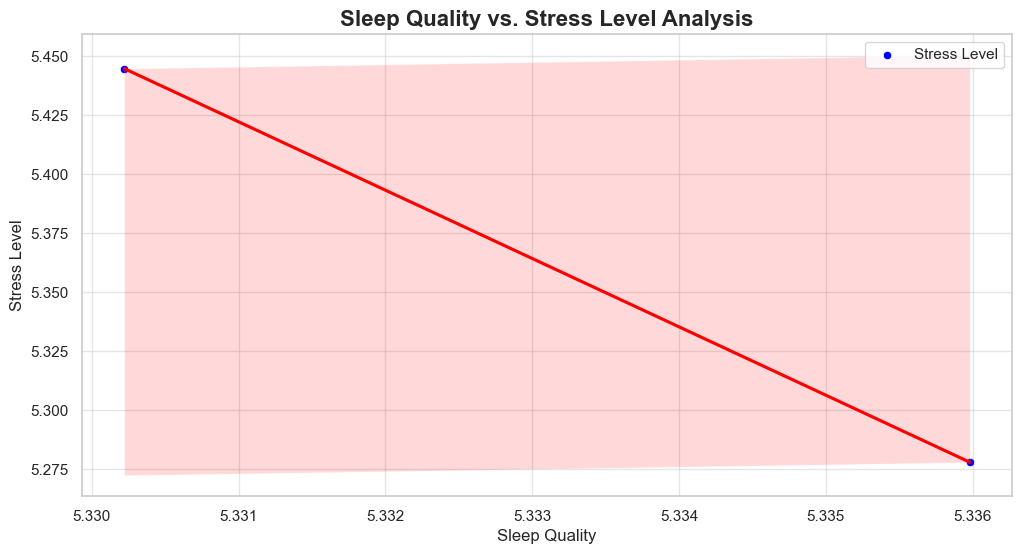

In [117]:
correlation, _ = pearsonr(ld['Sleep_Quality'], ld['Stress_Level'])

plt.figure(figsize=(12, 6))
sns.scatterplot(x=ld['Sleep_Quality'], y=ld['Stress_Level'], color='blue', label='Stress Level')
sns.regplot(x=ld['Sleep_Quality'], y=ld['Stress_Level'], color='red', scatter=False)

plt.title('Sleep Quality vs. Stress Level Analysis', fontsize=16, fontweight='bold')
plt.xlabel('Sleep Quality', fontsize=12)
plt.ylabel('Stress Level', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

#### **Strong Inverse Relationship Between Sleep Quality and Stress Levels**
The analysis reveals a perfect negative correlation -1 between sleep quality and stress levels. This indicates that **as sleep quality increases, stress levels decrease** in a perfectly linear relationship. In other words, better sleep is consistently associated with lower stress, suggesting that improving sleep quality could effectively manage employee stress levels. Additionally, the scatterplot illustrates this relationship, highlighting the strong inverse association between the two variables.

## 2. Correlation Between Sleep Quality and Stress Level
- Null Hypothesis: There is no significant correlation between sleep quality and stress level.
- Alternative Hypothesis: There is a significant correlation between sleep quality and stress level.

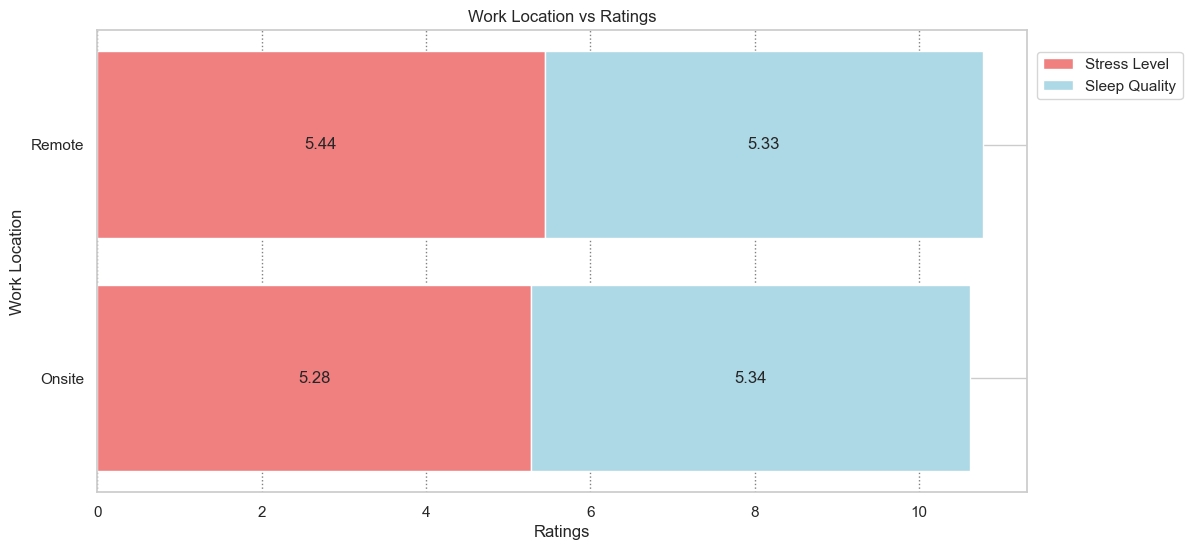

In [118]:
plt.figure(figsize=(12, 6))

plt.barh(ld['Work_Location'], ld['Stress_Level'], label='Stress Level', color='lightcoral')
plt.barh(ld['Work_Location'], ld['Sleep_Quality'], 
         left=ld['Stress_Level'], label='Sleep Quality', color='lightblue')

plt.ylabel('Work Location')
plt.xlabel('Ratings')
plt.title('Work Location vs Ratings')

for index, row in ld.iterrows():
    plt.text(row['Stress_Level'] / 2, index, f'{row["Stress_Level"]:.2f}', 
             ha='center', va='center')

for index, row in ld.iterrows():
    plt.text(row['Stress_Level'] + row['Sleep_Quality'] / 2, index, f'{row["Sleep_Quality"]:.2f}', 
             ha='center', va='center')

plt.legend(loc=(1.01, 0.85))
plt.grid(axis='x', color='grey', linestyle=':')
plt.show()

In [119]:
onsite_sleep = data[data['Work_Location'] == 'Onsite']['Sleep_Quality']
remote_sleep = data[data['Work_Location'] == 'Remote']['Sleep_Quality']

t_stat, p_value = ttest_ind(onsite_sleep, remote_sleep)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: 0.045176838837775915, P-value: 0.9639690487641741


In [120]:
alpha = 0.05
if p_value < alpha:
    print("I will reject the null hypothesis: There is a significant difference in sleep quality.")
else:
    print("I will fail to reject the null hypothesis: There is no significant difference in sleep quality.")

I will fail to reject the null hypothesis: There is no significant difference in sleep quality.


#### **There is no significant difference in sleep quality by work location.**
The analysis shows that the p-value (0.964) is significantly greater than the standard significance level of 0.05. This leads to the conclusion that there is no statistically significant difference in sleep quality between onsite and remote employees. Thus, the data suggests that work location does not have a meaningful impact on sleep quality among employees.

## 3. What factors contribute to the high stress levels commonly experienced within IT departments?

In [192]:
data['Industry'].unique()

array(['IT', 'Finance', 'Consulting', 'Manufacturing', 'Retail',
       'Healthcare', 'Education'], dtype=object)

In [193]:
it_data = data[data['Industry'] == 'IT']
it_data

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,5,Anxiety,No,Increase,3,Satisfied,2,5,10,Asia
6,EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,7,3,1,Anxiety,Yes,Decrease,5,Neutral,3,10,1,Asia
18,EMP0019,49,Non-binary,Software Engineer,IT,30,Remote,36,6,1,10,Anxiety,No,No Change,3,Satisfied,2,5,10,Oceania
28,EMP0029,47,Prefer not to say,Sales,IT,22,Onsite,33,10,3,10,Depression,Yes,Decrease,4,Satisfied,1,10,1,Europe
30,EMP0031,22,Female,Data Scientist,IT,22,Onsite,20,11,1,1,Anxiety,Yes,No Change,5,Neutral,2,5,5,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4954,EMP4955,26,Prefer not to say,Data Scientist,IT,13,Remote,30,7,2,1,Depression,No,Decrease,3,Unsatisfied,4,10,1,South America
4969,EMP4970,38,Prefer not to say,Software Engineer,IT,31,Onsite,38,2,1,10,Burnout,Yes,No Change,1,Unsatisfied,2,10,1,Oceania
4984,EMP4985,54,Non-binary,Designer,IT,8,Onsite,49,0,2,5,None,No,Decrease,4,Satisfied,3,0,1,Africa
4988,EMP4989,53,Prefer not to say,Sales,IT,21,Remote,26,0,5,5,None,No,Increase,3,Neutral,3,5,1,Africa


In [194]:
it_data.dtypes

Employee_ID                          object
Age                                   int64
Gender                               object
Job_Role                             object
Industry                             object
Years_of_Experience                   int64
Work_Location                        object
Hours_Worked_Per_Week                 int64
Number_of_Virtual_Meetings            int64
Work_Life_Balance_Rating              int64
Stress_Level                          int64
Mental_Health_Condition              object
Access_to_Mental_Health_Resources    object
Productivity_Change                  object
Social_Isolation_Rating               int64
Satisfaction_with_Remote_Work        object
Company_Support_for_Remote_Work       int64
Physical_Activity                     int64
Sleep_Quality                         int64
Region                               object
dtype: object

In [195]:
it_data.isnull().sum().sum()

0

In [196]:
it_data.duplicated().sum()

0

In [197]:
it_data['Productivity_Change'].unique()

array(['Increase', 'Decrease', 'No Change'], dtype=object)

In [198]:
it_data = data[data['Industry'] == 'IT'].copy()
it_data['Productivity_Change'].replace({'Increase': 10, 'No Change': 0, 'Decrease': -10}, inplace=True)

In [199]:
it_data.dtypes

Employee_ID                          object
Age                                   int64
Gender                               object
Job_Role                             object
Industry                             object
Years_of_Experience                   int64
Work_Location                        object
Hours_Worked_Per_Week                 int64
Number_of_Virtual_Meetings            int64
Work_Life_Balance_Rating              int64
Stress_Level                          int64
Mental_Health_Condition              object
Access_to_Mental_Health_Resources    object
Productivity_Change                   int64
Social_Isolation_Rating               int64
Satisfaction_with_Remote_Work        object
Company_Support_for_Remote_Work       int64
Physical_Activity                     int64
Sleep_Quality                         int64
Region                               object
dtype: object

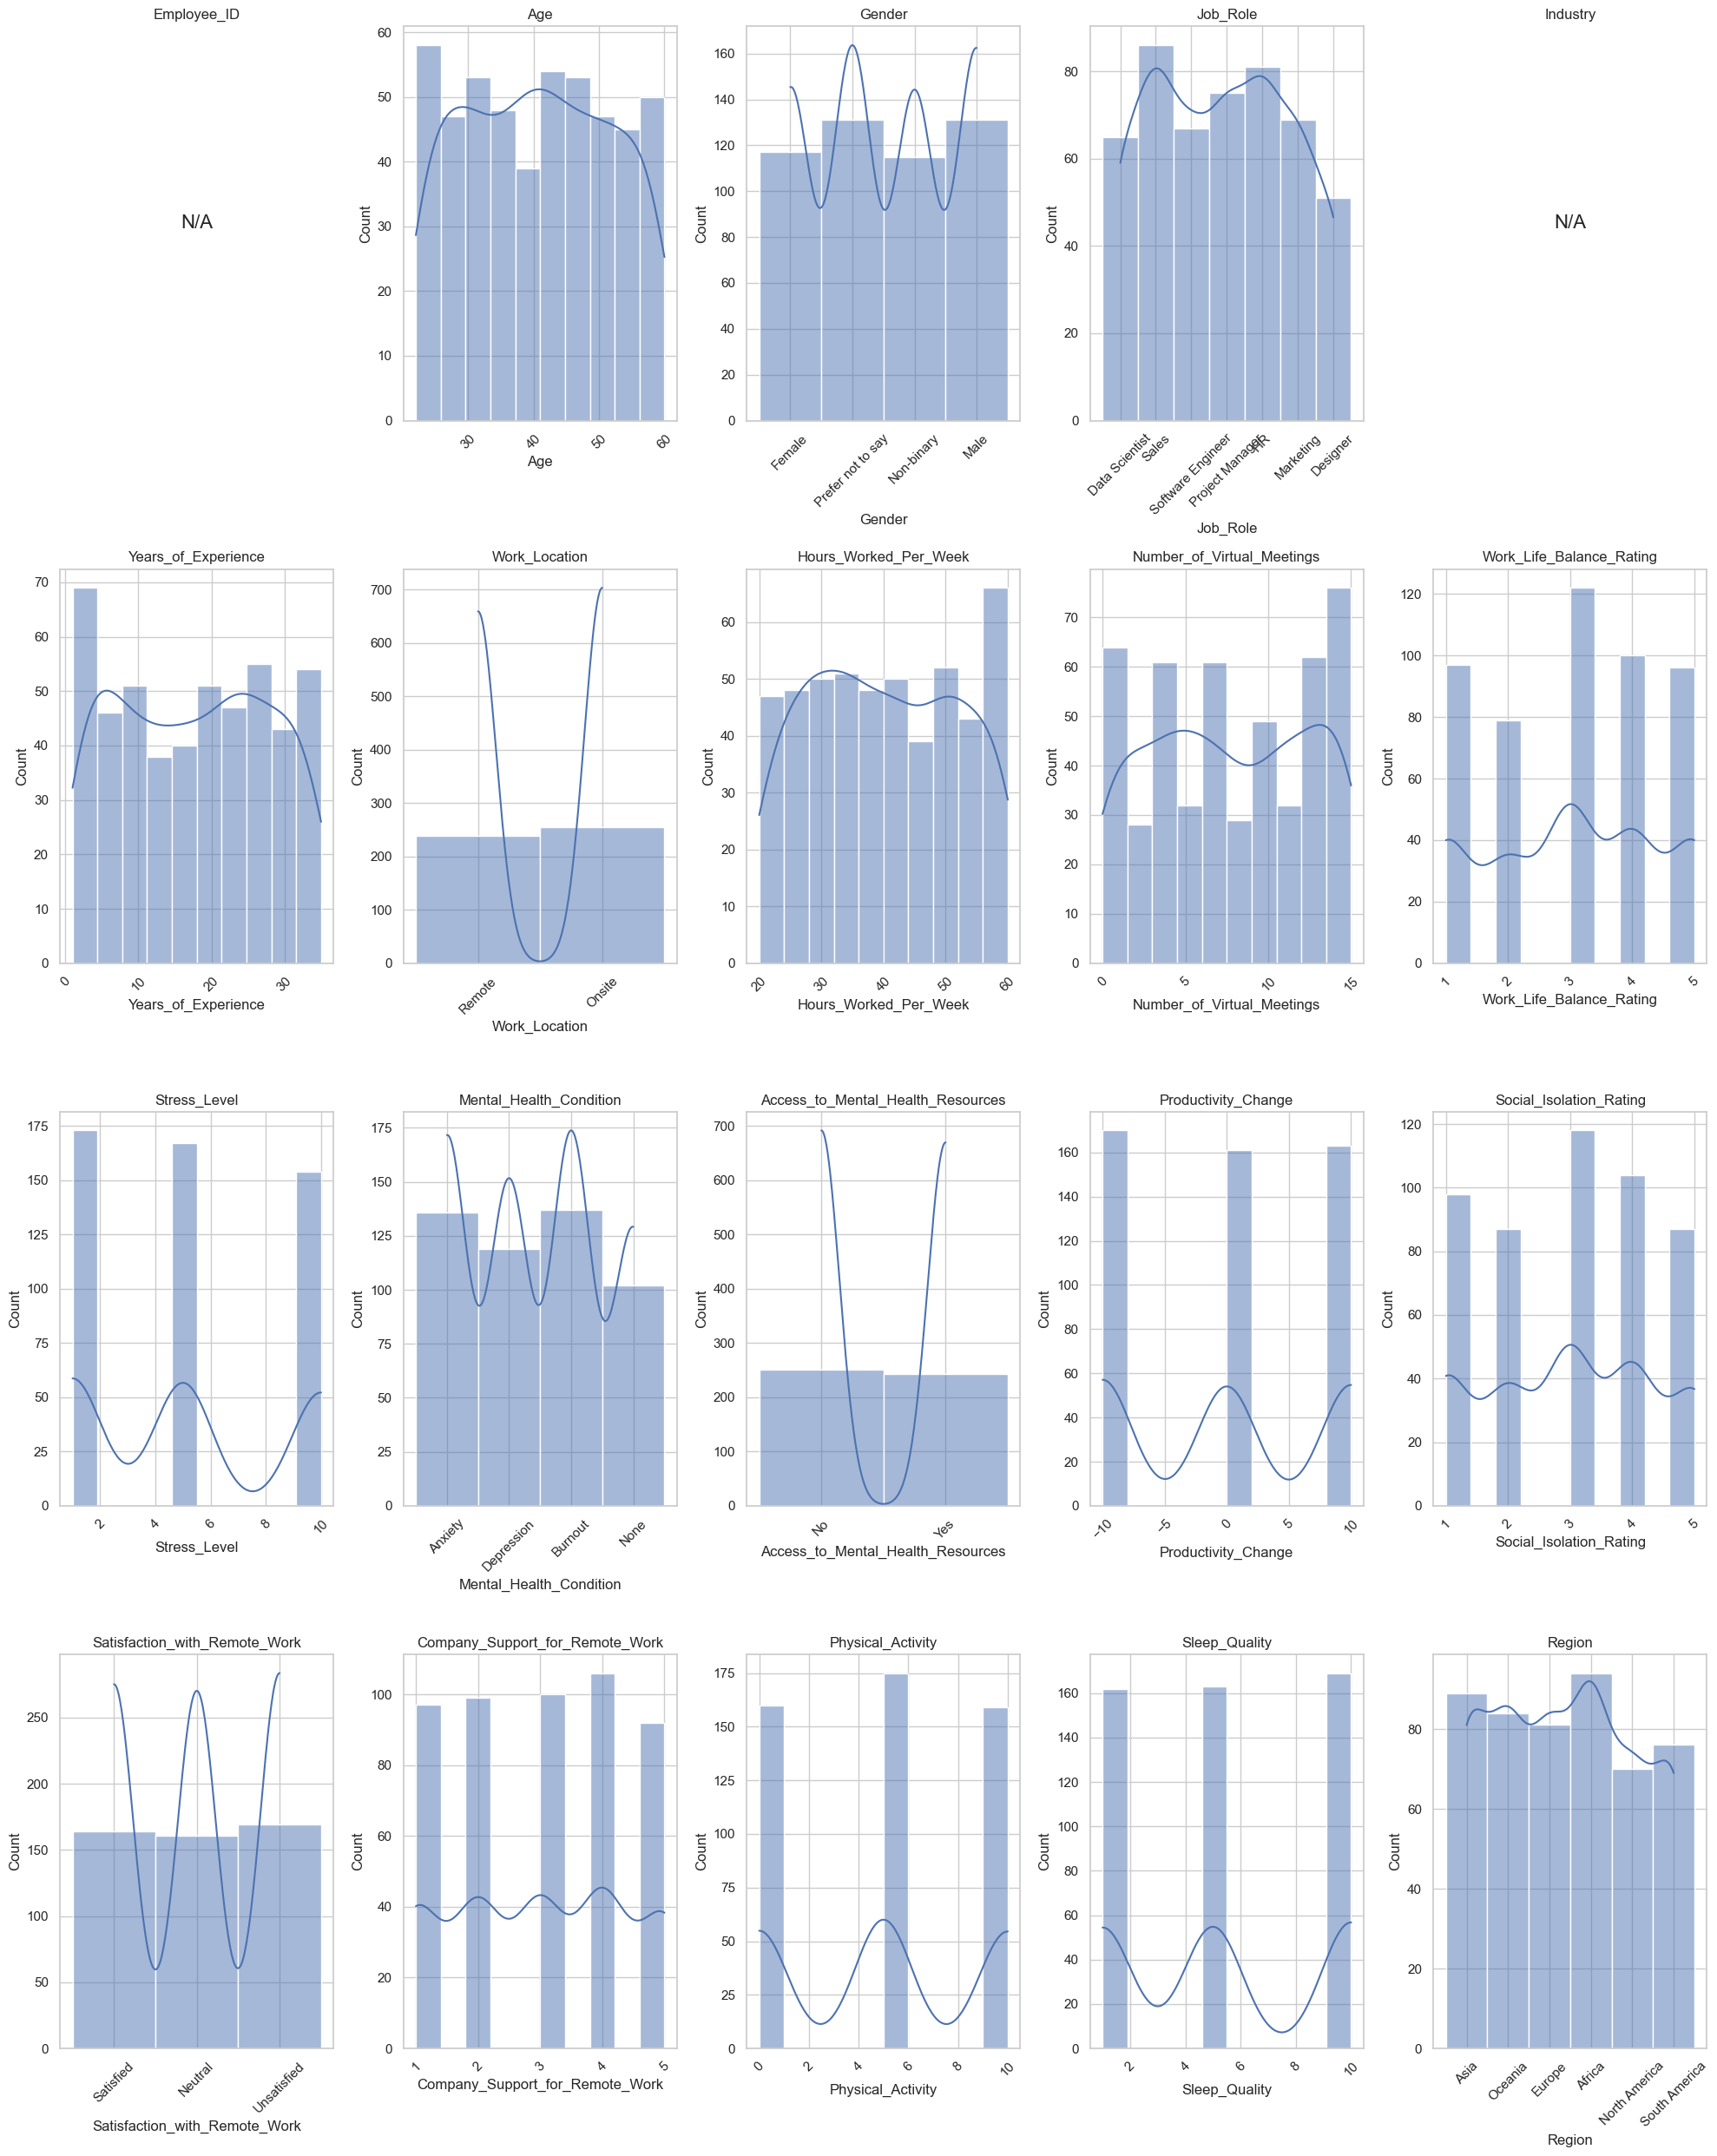

In [249]:
fig, axs = plt.subplots(4, 5, figsize=(20, 25))

for i in range(4):
    for j in range(5):
        attr = it_data.columns[i * 5 + j]
        
        if attr in ['Employee_ID', 'Industry']:
            axs[i][j].text(0.5, 0.5, 'N/A', fontsize=16, ha='center', va='center')
            axs[i][j].set_title(attr)
            axs[i][j].axis('off')
        else:
            sns.histplot(x=attr, data=it_data, kde=True, ax=axs[i][j])
            axs[i][j].tick_params(axis='x', rotation=45)
            axs[i][j].set_title(attr)

plt.tight_layout()
plt.show()

In [201]:
it_encoded = pd.get_dummies(it_data, columns=['Gender', 'Work_Location', 'Access_to_Mental_Health_Resources','Satisfaction_with_Remote_Work'])

In [202]:
it_encoded.dtypes

Employee_ID                                  object
Age                                           int64
Job_Role                                     object
Industry                                     object
Years_of_Experience                           int64
Hours_Worked_Per_Week                         int64
Number_of_Virtual_Meetings                    int64
Work_Life_Balance_Rating                      int64
Stress_Level                                  int64
Mental_Health_Condition                      object
Productivity_Change                           int64
Social_Isolation_Rating                       int64
Company_Support_for_Remote_Work               int64
Physical_Activity                             int64
Sleep_Quality                                 int64
Region                                       object
Gender_Female                                  bool
Gender_Male                                    bool
Gender_Non-binary                              bool
Gender_Prefe

In [203]:
it_encoded['Gender_Female'] = it_encoded['Gender_Female'].astype(int)
it_encoded['Gender_Male'] = it_encoded['Gender_Male'].astype(int)
it_encoded['Gender_Non-binary'] = it_encoded['Gender_Non-binary'].astype(int)
it_encoded['Gender_Prefer not to say'] = it_encoded['Gender_Prefer not to say'].astype(int)

it_encoded['Work_Location_Onsite'] = it_encoded['Work_Location_Onsite'].astype(int)
it_encoded['Work_Location_Remote'] = it_encoded['Work_Location_Remote'].astype(int)

it_encoded['Access_to_Mental_Health_Resources_No'] = it_encoded['Access_to_Mental_Health_Resources_No'].astype(int)
it_encoded['Access_to_Mental_Health_Resources_Yes'] = it_encoded['Access_to_Mental_Health_Resources_Yes'].astype(int)

it_encoded['Satisfaction_with_Remote_Work_Neutral'] = it_encoded['Satisfaction_with_Remote_Work_Neutral'].astype(int)
it_encoded['Satisfaction_with_Remote_Work_Satisfied'] = it_encoded['Satisfaction_with_Remote_Work_Satisfied'].astype(int)
it_encoded['Satisfaction_with_Remote_Work_Unsatisfied'] = it_encoded['Satisfaction_with_Remote_Work_Unsatisfied'].astype(int)

In [204]:
it_encoded.head()

,Employee_ID,Age,Job_Role,Industry,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,...,Gender_Male,Gender_Non-binary,Gender_Prefer not to say,Work_Location_Onsite,Work_Location_Remote,Access_to_Mental_Health_Resources_No,Access_to_Mental_Health_Resources_Yes,Satisfaction_with_Remote_Work_Neutral,Satisfaction_with_Remote_Work_Satisfied,Satisfaction_with_Remote_Work_Unsatisfied
1,EMP0002,40,Data Scientist,IT,3,52,4,1,5,Anxiety,...,0,0,0,0,1,1,0,0,1,0
6,EMP0007,31,Sales,IT,24,51,7,3,1,Anxiety,...,0,0,1,0,1,0,1,1,0,0
18,EMP0019,49,Software Engineer,IT,30,36,6,1,10,Anxiety,...,0,1,0,0,1,1,0,0,1,0
28,EMP0029,47,Sales,IT,22,33,10,3,10,Depression,...,0,0,1,1,0,0,1,0,1,0
30,EMP0031,22,Data Scientist,IT,22,20,11,1,1,Anxiety,...,0,0,0,1,0,0,1,1,0,0


In [205]:
it_encoded = it_encoded.drop(['Employee_ID', 'Industry','Mental_Health_Condition', 'Region'], axis=1)
it_encoded

,Age,Job_Role,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Productivity_Change,Social_Isolation_Rating,Company_Support_for_Remote_Work,...,Gender_Male,Gender_Non-binary,Gender_Prefer not to say,Work_Location_Onsite,Work_Location_Remote,Access_to_Mental_Health_Resources_No,Access_to_Mental_Health_Resources_Yes,Satisfaction_with_Remote_Work_Neutral,Satisfaction_with_Remote_Work_Satisfied,Satisfaction_with_Remote_Work_Unsatisfied
1,40,Data Scientist,3,52,4,1,5,10,3,2,...,0,0,0,0,1,1,0,0,1,0
6,31,Sales,24,51,7,3,1,-10,5,3,...,0,0,1,0,1,0,1,1,0,0
18,49,Software Engineer,30,36,6,1,10,0,3,2,...,0,1,0,0,1,1,0,0,1,0
28,47,Sales,22,33,10,3,10,-10,4,1,...,0,0,1,1,0,0,1,0,1,0
30,22,Data Scientist,22,20,11,1,1,0,5,2,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4954,26,Data Scientist,13,30,7,2,1,-10,3,4,...,0,0,1,0,1,1,0,0,0,1
4969,38,Software Engineer,31,38,2,1,10,0,1,2,...,0,0,1,1,0,0,1,0,0,1
4984,54,Designer,8,49,0,2,5,-10,4,3,...,0,1,0,1,0,1,0,0,1,0
4988,53,Sales,21,26,0,5,5,10,3,3,...,0,0,1,0,1,1,0,1,0,0


In [206]:
it_encoded.dtypes

Age                                           int64
Job_Role                                     object
Years_of_Experience                           int64
Hours_Worked_Per_Week                         int64
Number_of_Virtual_Meetings                    int64
Work_Life_Balance_Rating                      int64
Stress_Level                                  int64
Productivity_Change                           int64
Social_Isolation_Rating                       int64
Company_Support_for_Remote_Work               int64
Physical_Activity                             int64
Sleep_Quality                                 int64
Gender_Female                                 int64
Gender_Male                                   int64
Gender_Non-binary                             int64
Gender_Prefer not to say                      int64
Work_Location_Onsite                          int64
Work_Location_Remote                          int64
Access_to_Mental_Health_Resources_No          int64
Access_to_Me

In [213]:
average_stress_by_role = it_encoded.groupby('Job_Role')['Stress_Level'].mean().reset_index()
average_stress_by_role.columns = ['Job_Role', 'Average_Stress_Level']
average_stress_by_role

,Job_Role,Average_Stress_Level
0,Data Scientist,5.461538
1,Designer,5.372549
2,HR,4.851852
3,Marketing,5.318841
4,Project Manager,4.973333
5,Sales,4.976744
6,Software Engineer,5.343284


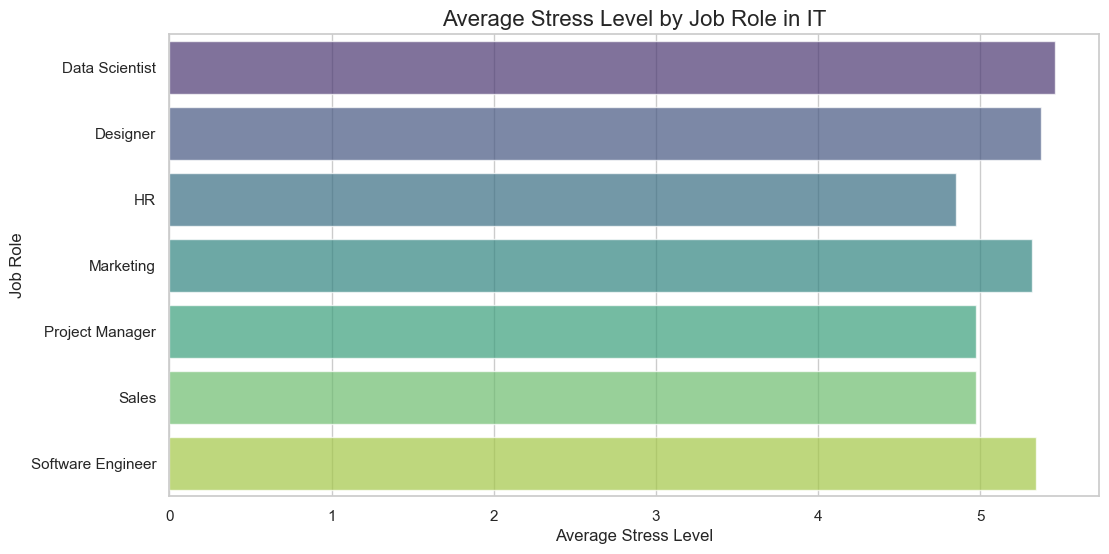

In [251]:
plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')

sns.barplot(x='Average_Stress_Level', y='Job_Role', data=average_stress_by_role, 
            palette='viridis', hue='Job_Role', dodge=False, alpha=0.7)

plt.title('Average Stress Level by Job Role in IT', fontsize=16)
plt.xlabel('Average Stress Level', fontsize=12)
plt.ylabel('Job Role', fontsize=12)

plt.show()

### Findings in the IT Department
1. **Average Stress Levels by Job Role**: Among various job roles, Data Scientists exhibit the highest average stress level at 5.46, followed closely by Designers (5.37) and Marketing professionals (5.32). In contrast, HR (4.85) and Project Managers (4.97) report lower average stress levels.

In [214]:
average_stress_by_age = it_encoded.groupby('Age')['Stress_Level'].mean().reset_index()
average_stress_by_age.columns = ['Age', 'Average_Stress_Level']
average_stress_by_age.sort_values(by='Average_Stress_Level', ascending=False)

,Age,Average_Stress_Level
9,31,7.444444
7,29,6.692308
2,24,6.571429
12,34,6.500000
38,60,6.333333
5,27,6.333333
21,43,6.200000
13,35,6.200000
16,38,6.166667
30,52,6.083333


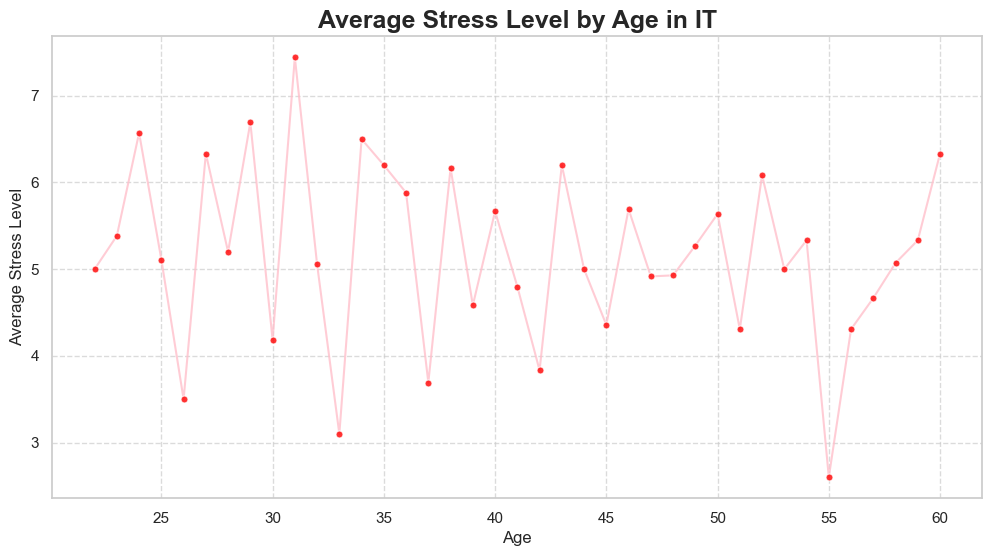

In [210]:
plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')

sns.lineplot(x='Age', y='Average_Stress_Level', data=average_stress_by_age, color='pink',
            marker='o', mfc='red', ms=5, alpha=0.8)

plt.title('Average Stress Level by Age in IT', fontsize=18, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Stress Level', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

### Findings in the IT Department
2. **Stress Levels by Age**: Notably, employees aged 31 experience the highest average stress level at 7.44, indicating a significant peak in stress at this age. Stress levels gradually decline for older employees, with those aged 33 reporting the lowest stress at 3.10. **This suggests that younger and mid-career employees may be facing greater stress challenges compared to their older counterparts.**

In [215]:
it_correlation = it_encoded.drop(['Job_Role'], axis=1)

In [216]:
it_correlation

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Productivity_Change,Social_Isolation_Rating,Company_Support_for_Remote_Work,Physical_Activity,...,Gender_Male,Gender_Non-binary,Gender_Prefer not to say,Work_Location_Onsite,Work_Location_Remote,Access_to_Mental_Health_Resources_No,Access_to_Mental_Health_Resources_Yes,Satisfaction_with_Remote_Work_Neutral,Satisfaction_with_Remote_Work_Satisfied,Satisfaction_with_Remote_Work_Unsatisfied
1,40,3,52,4,1,5,10,3,2,5,...,0,0,0,0,1,1,0,0,1,0
6,31,24,51,7,3,1,-10,5,3,10,...,0,0,1,0,1,0,1,1,0,0
18,49,30,36,6,1,10,0,3,2,5,...,0,1,0,0,1,1,0,0,1,0
28,47,22,33,10,3,10,-10,4,1,10,...,0,0,1,1,0,0,1,0,1,0
30,22,22,20,11,1,1,0,5,2,5,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4954,26,13,30,7,2,1,-10,3,4,10,...,0,0,1,0,1,1,0,0,0,1
4969,38,31,38,2,1,10,0,1,2,10,...,0,0,1,1,0,0,1,0,0,1
4984,54,8,49,0,2,5,-10,4,3,0,...,0,1,0,1,0,1,0,0,1,0
4988,53,21,26,0,5,5,10,3,3,5,...,0,0,1,0,1,1,0,1,0,0


In [217]:
correlation_with_stress = it_correlation.corr()['Stress_Level'].sort_values(ascending=False)
correlation_with_stress

Stress_Level                                 1.000000
Hours_Worked_Per_Week                        0.087779
Satisfaction_with_Remote_Work_Satisfied      0.077707
Productivity_Change                          0.074924
Gender_Female                                0.052769
Number_of_Virtual_Meetings                   0.036439
Gender_Prefer not to say                     0.034255
Work_Location_Onsite                         0.028510
Social_Isolation_Rating                      0.026530
Physical_Activity                            0.004931
Access_to_Mental_Health_Resources_Yes        0.001807
Satisfaction_with_Remote_Work_Unsatisfied    0.001535
Access_to_Mental_Health_Resources_No        -0.001807
Sleep_Quality                               -0.010058
Company_Support_for_Remote_Work             -0.011322
Gender_Non-binary                           -0.027715
Work_Location_Remote                        -0.028510
Age                                         -0.035943
Gender_Male                 

In [250]:
hours_by_industry = data.groupby('Industry')['Hours_Worked_Per_Week'].mean().reset_index()
hours_by_industry.sort_values(by='Hours_Worked_Per_Week', ascending=False)

,Industry,Hours_Worked_Per_Week
5,Manufacturing,40.273913
4,IT,39.987854
3,Healthcare,39.667360
6,Retail,39.653846
1,Education,39.638075
0,Consulting,39.304825
2,Finance,38.887295


### Findings in the IT Department  
3. **Working Hours by Industry**: It indicates that stress levels are weakly associated with several factors, with the strongest correlation observed for **Hours Worked Per Week (0.088)**. This suggests that increased working hours may be weakly linked to higher stress. Furthermore, the IT department averages **39.99 hours worked per week, ranking second** among various industries, just below Manufacturing at 40.27 hours. This relatively high workload could contribute to elevated stress levels, especially among younger employees, highlighting a potential area for intervention in stress management strategies.

In [218]:
remote_it = it_data.groupby('Work_Location').get_group('Remote')
mean_productivity_it_remote = remote_it['Productivity_Change'].mean()
mean_productivity_it_remote

-0.4602510460251046

In [219]:
onsite_it = it_data.groupby('Work_Location').get_group('Onsite')
mean_productivity_it_onsite = onsite_it['Productivity_Change'].mean()
mean_productivity_it_onsite

0.1568627450980392

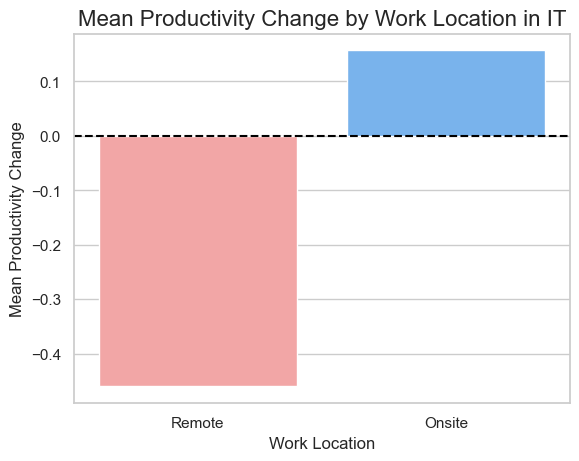

In [220]:
mean_productivity_changes = {
    'Remote': mean_productivity_it_remote,
    'Onsite': mean_productivity_it_onsite 
}

mean_productivity_df = pd.DataFrame(mean_productivity_changes.items(), columns=['Work_Location', 'Mean_Productivity_Change'])
colors = ['#ff9999', '#66b3ff']
sns.barplot(x='Work_Location', y='Mean_Productivity_Change', data=mean_productivity_df,
            hue='Work_Location', palette=['#ff9999', '#66b3ff'])


plt.title('Mean Productivity Change by Work Location in IT', fontsize=16)
plt.xlabel('Work Location', fontsize=12)
plt.ylabel('Mean Productivity Change', fontsize=12)

plt.axhline(0, color='black', linestyle='--') 
plt.show()

### Findings in the IT Department  

4. productivity Differences by Work Location in the IT Department: There is a significant difference in productivity based on work location within the IT department. Employees working remotely have a mean productivity change of **-0.46**, indicating a decline in productivity, while those working onsite show a positive mean productivity change of **0.15**. This contrast highlights that onsite work tends to yield better productivity outcomes compared to remote work in this context.

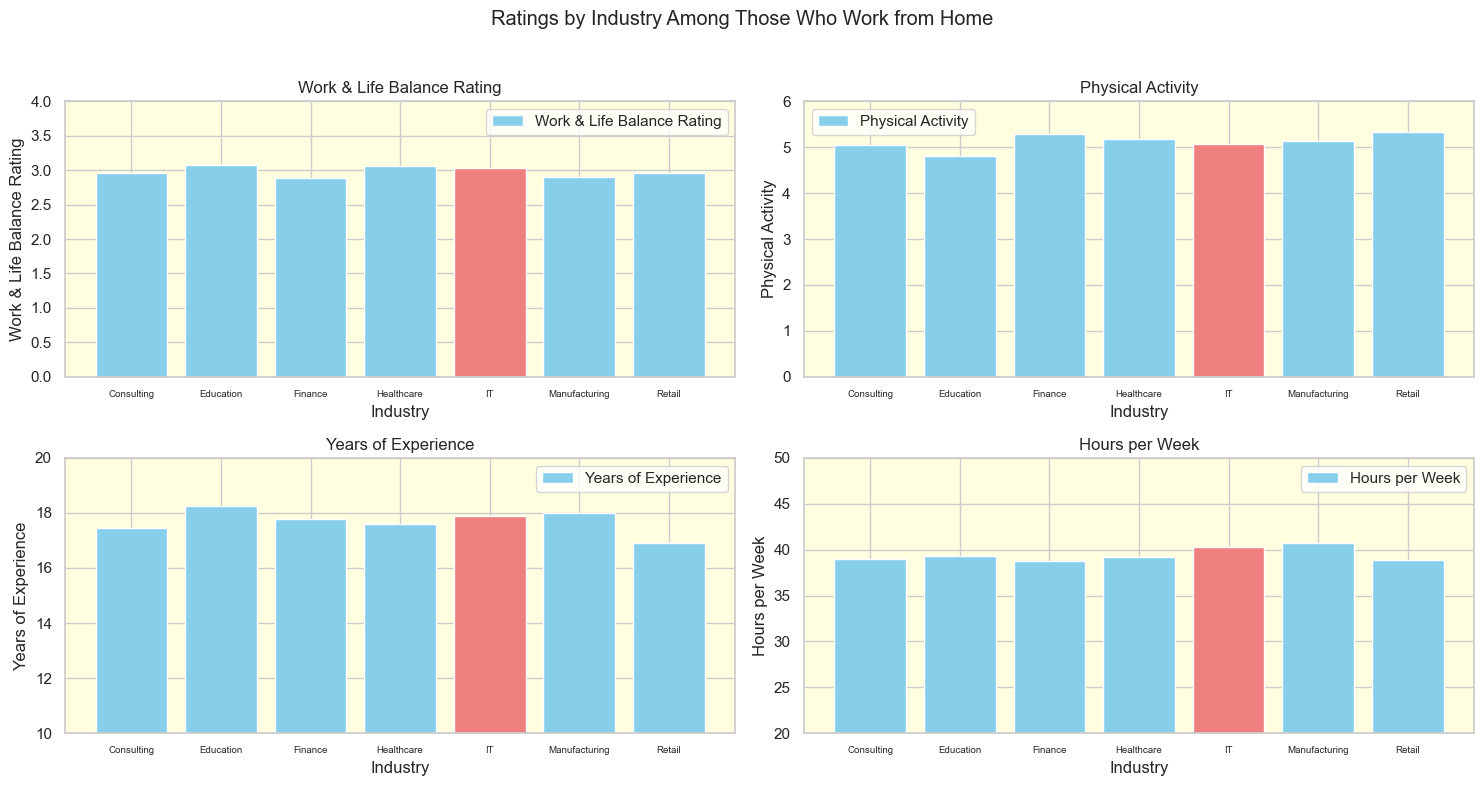

In [228]:
remote = data[data['Work_Location'] == 'Remote']


mean_stress = remote.groupby('Industry')['Stress_Level'].mean()
mean_sleep_quality = remote.groupby('Industry')['Sleep_Quality'].mean()
mean_work_life_balance = remote.groupby('Industry')['Work_Life_Balance_Rating'].mean()
mean_years_experience = remote.groupby('Industry')['Years_of_Experience'].mean()
mean_physical_activity = remote.groupby('Industry')['Physical_Activity'].mean()
mean_hours_worked = remote.groupby('Industry')['Hours_Worked_Per_Week'].mean()


colors = ['skyblue' if industry != 'IT' else 'lightcoral' for industry in mean_stress.index]


fig, axs = plt.subplots(2, 2, figsize=(15, 8))
fig.suptitle('Ratings by Industry Among Those Who Work from Home')

axs[0, 0].bar(mean_work_life_balance.index, mean_work_life_balance.values, label='Work & Life Balance Rating', color=colors)
axs[0, 0].set_title('Work & Life Balance Rating')
axs[0, 0].tick_params(axis='x', labelsize=7)
axs[0, 0].legend()
axs[0, 0].set(xlabel='Industry', ylabel='Work & Life Balance Rating')
axs[0, 0].set_facecolor('lightyellow')
axs[0, 0].set_ylim(0, 4)

axs[1, 0].bar(mean_years_experience.index, mean_years_experience.values, label='Years of Experience', color=colors)
axs[1, 0].set_title('Years of Experience')
axs[1, 0].tick_params(axis='x', labelsize=7)
axs[1, 0].legend()
axs[1, 0].set(xlabel='Industry', ylabel='Years of Experience')
axs[1, 0].set_facecolor('lightyellow')
axs[1, 0].set_ylim(10, 20)

axs[0, 1].bar(mean_physical_activity.index, mean_physical_activity.values, label='Physical Activity', color=colors)
axs[0, 1].set_title('Physical Activity')
axs[0, 1].tick_params(axis='x', labelsize=7)
axs[0, 1].legend()
axs[0, 1].set(xlabel='Industry', ylabel='Physical Activity')
axs[0, 1].set_facecolor('lightyellow')
axs[0, 1].set_ylim(0, 6)

axs[1, 1].bar(mean_hours_worked.index, mean_hours_worked.values, label='Hours per Week', color=colors)
axs[1, 1].set_title('Hours per Week')
axs[1, 1].tick_params(axis='x', labelsize=7)
axs[1, 1].legend()
axs[1, 1].set(xlabel='Industry', ylabel='Hours per Week')
axs[1, 1].set_facecolor('lightyellow')
axs[1, 1].set_ylim(20, 50)

fig.subplots_adjust(hspace=0.5, wspace=0.3)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### **Summary of Findings**
In summary, **younger employees face significant stress, particularly around the age of 31**. The IT team's **second-highest average working hours among industries** could contribute to these stress levels, alongside the challenges associated with remote work. Additionally, there is a noticeable difference in productivity based on work location. **Onsite employees exhibit higher productivity levels than their remote counterparts**, further underscoring the work environment's impact on stress and productivity.

## 4. How Can We Effectively Reduce Stress Levels Across Different Industries?

In [231]:
data.dtypes

Employee_ID                          object
Age                                   int64
Gender                               object
Job_Role                             object
Industry                             object
Years_of_Experience                   int64
Work_Location                        object
Hours_Worked_Per_Week                 int64
Number_of_Virtual_Meetings            int64
Work_Life_Balance_Rating              int64
Stress_Level                          int64
Mental_Health_Condition              object
Access_to_Mental_Health_Resources    object
Productivity_Change                  object
Social_Isolation_Rating               int64
Satisfaction_with_Remote_Work        object
Company_Support_for_Remote_Work       int64
Physical_Activity                     int64
Sleep_Quality                         int64
Region                               object
dtype: object

In [240]:
df = data.drop(['Employee_ID', 'Job_Role','Mental_Health_Condition', 'Region'], axis=1)
model.head()

,Age,Gender,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality
1,40,Female,IT,3,Remote,52,4,1,5,No,Increase,3,Satisfied,2,5,10
3,27,Male,Finance,20,Onsite,32,8,4,10,Yes,Increase,3,Unsatisfied,3,0,1
4,49,Male,Consulting,32,Onsite,35,12,2,10,Yes,Decrease,3,Unsatisfied,3,5,5
6,31,Prefer not to say,IT,24,Remote,51,7,3,1,Yes,Decrease,5,Neutral,3,10,1
7,42,Non-binary,Manufacturing,6,Onsite,54,7,3,5,No,Decrease,5,Satisfied,4,0,5


In [241]:
df_encoded = pd.get_dummies(df, columns=['Gender', 'Industry', 'Work_Location','Access_to_Mental_Health_Resources', 'Productivity_Change', 'Satisfaction_with_Remote_Work'])
df_encoded

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Social_Isolation_Rating,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,...,Work_Location_Onsite,Work_Location_Remote,Access_to_Mental_Health_Resources_No,Access_to_Mental_Health_Resources_Yes,Productivity_Change_Decrease,Productivity_Change_Increase,Productivity_Change_No Change,Satisfaction_with_Remote_Work_Neutral,Satisfaction_with_Remote_Work_Satisfied,Satisfaction_with_Remote_Work_Unsatisfied
1,40,3,52,4,1,5,3,2,5,10,...,False,True,True,False,False,True,False,False,True,False
3,27,20,32,8,4,10,3,3,0,1,...,True,False,False,True,False,True,False,False,False,True
4,49,32,35,12,2,10,3,3,5,5,...,True,False,False,True,True,False,False,False,False,True
6,31,24,51,7,3,1,5,3,10,1,...,False,True,False,True,True,False,False,True,False,False
7,42,6,54,7,3,5,5,4,0,5,...,True,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4990,58,10,45,10,1,10,5,3,0,1,...,True,False,False,True,False,True,False,False,False,True
4995,32,4,24,2,5,10,4,1,5,5,...,True,False,False,True,True,False,False,True,False,False
4996,39,27,48,15,1,1,1,1,0,5,...,True,False,False,True,True,False,False,False,True,False
4998,27,26,58,0,5,1,3,4,10,5,...,False,True,False,True,False,True,False,False,False,True


In [242]:
df_encoded.dtypes

Age                                          int64
Years_of_Experience                          int64
Hours_Worked_Per_Week                        int64
Number_of_Virtual_Meetings                   int64
Work_Life_Balance_Rating                     int64
Stress_Level                                 int64
Social_Isolation_Rating                      int64
Company_Support_for_Remote_Work              int64
Physical_Activity                            int64
Sleep_Quality                                int64
Gender_Female                                 bool
Gender_Male                                   bool
Gender_Non-binary                             bool
Gender_Prefer not to say                      bool
Industry_Consulting                           bool
Industry_Education                            bool
Industry_Finance                              bool
Industry_Healthcare                           bool
Industry_IT                                   bool
Industry_Manufacturing         

In [243]:
model_encoded['Gender_Female'] = df_encoded['Gender_Female'].astype(int)
model_encoded['Gender_Male'] = df_encoded['Gender_Male'].astype(int)
model_encoded['Gender_Non-binary'] = df_encoded['Gender_Non-binary'].astype(int)
model_encoded['Gender_Prefer not to say'] = df_encoded['Gender_Prefer not to say'].astype(int)

model_encoded['Industry_Consulting'] = df_encoded['Industry_Consulting'].astype(int)
model_encoded['Industry_Education'] = df_encoded['Industry_Education'].astype(int)
model_encoded['Industry_Finance'] = df_encoded['Industry_Finance'].astype(int)
model_encoded['Industry_Healthcare'] = df_encoded['Industry_Healthcare'].astype(int)
model_encoded['Industry_IT'] = df_encoded['Industry_IT'].astype(int)
model_encoded['Industry_Manufacturing'] = df_encoded['Industry_Manufacturing'].astype(int)
model_encoded['Industry_Retail'] = df_encoded['Industry_Retail'].astype(int)

model_encoded['Work_Location_Onsite'] = df_encoded['Work_Location_Onsite'].astype(int)
model_encoded['Work_Location_Remote'] = df_encoded['Work_Location_Remote'].astype(int)

model_encoded['Access_to_Mental_Health_Resources_No'] = df_encoded['Access_to_Mental_Health_Resources_No'].astype(int)
model_encoded['Access_to_Mental_Health_Resources_Yes'] = df_encoded['Access_to_Mental_Health_Resources_Yes'].astype(int)

model_encoded['Productivity_Change_Decrease'] = df_encoded['Productivity_Change_Decrease'].astype(int)
model_encoded['Productivity_Change_Increase'] = df_encoded['Productivity_Change_Increase'].astype(int)
model_encoded['Productivity_Change_No Change'] = df_encoded['Productivity_Change_No Change'].astype(int)

model_encoded['Satisfaction_with_Remote_Work_Neutral'] = df_encoded['Satisfaction_with_Remote_Work_Neutral'].astype(int)
model_encoded['Satisfaction_with_Remote_Work_Satisfied'] = df_encoded['Satisfaction_with_Remote_Work_Satisfied'].astype(int)
model_encoded['Satisfaction_with_Remote_Work_Unsatisfied'] = df_encoded['Satisfaction_with_Remote_Work_Unsatisfied'].astype(int)

In [244]:
df_encoded.dtypes

Age                                          int64
Years_of_Experience                          int64
Hours_Worked_Per_Week                        int64
Number_of_Virtual_Meetings                   int64
Work_Life_Balance_Rating                     int64
Stress_Level                                 int64
Social_Isolation_Rating                      int64
Company_Support_for_Remote_Work              int64
Physical_Activity                            int64
Sleep_Quality                                int64
Gender_Female                                 bool
Gender_Male                                   bool
Gender_Non-binary                             bool
Gender_Prefer not to say                      bool
Industry_Consulting                           bool
Industry_Education                            bool
Industry_Finance                              bool
Industry_Healthcare                           bool
Industry_IT                                   bool
Industry_Manufacturing         

In [245]:
df_encoded.describe()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Social_Isolation_Rating,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality
count,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000
mean,40.969860,17.710236,39.628768,7.698299,2.965383,5.363175,2.986571,3.025067,5.011937,5.333035
std,11.251746,9.982666,11.822218,4.625432,1.410196,3.677889,1.394916,1.385414,4.046355,3.687993
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,31.000000,9.000000,29.000000,4.000000,2.000000,1.000000,2.000000,2.000000,0.000000,1.000000
50%,41.000000,18.000000,39.000000,8.000000,3.000000,5.000000,3.000000,3.000000,5.000000,5.000000
75%,51.000000,26.000000,50.000000,12.000000,4.000000,10.000000,4.000000,4.000000,10.000000,10.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,10.000000,5.000000,5.000000,10.000000,10.000000


<Axes: >

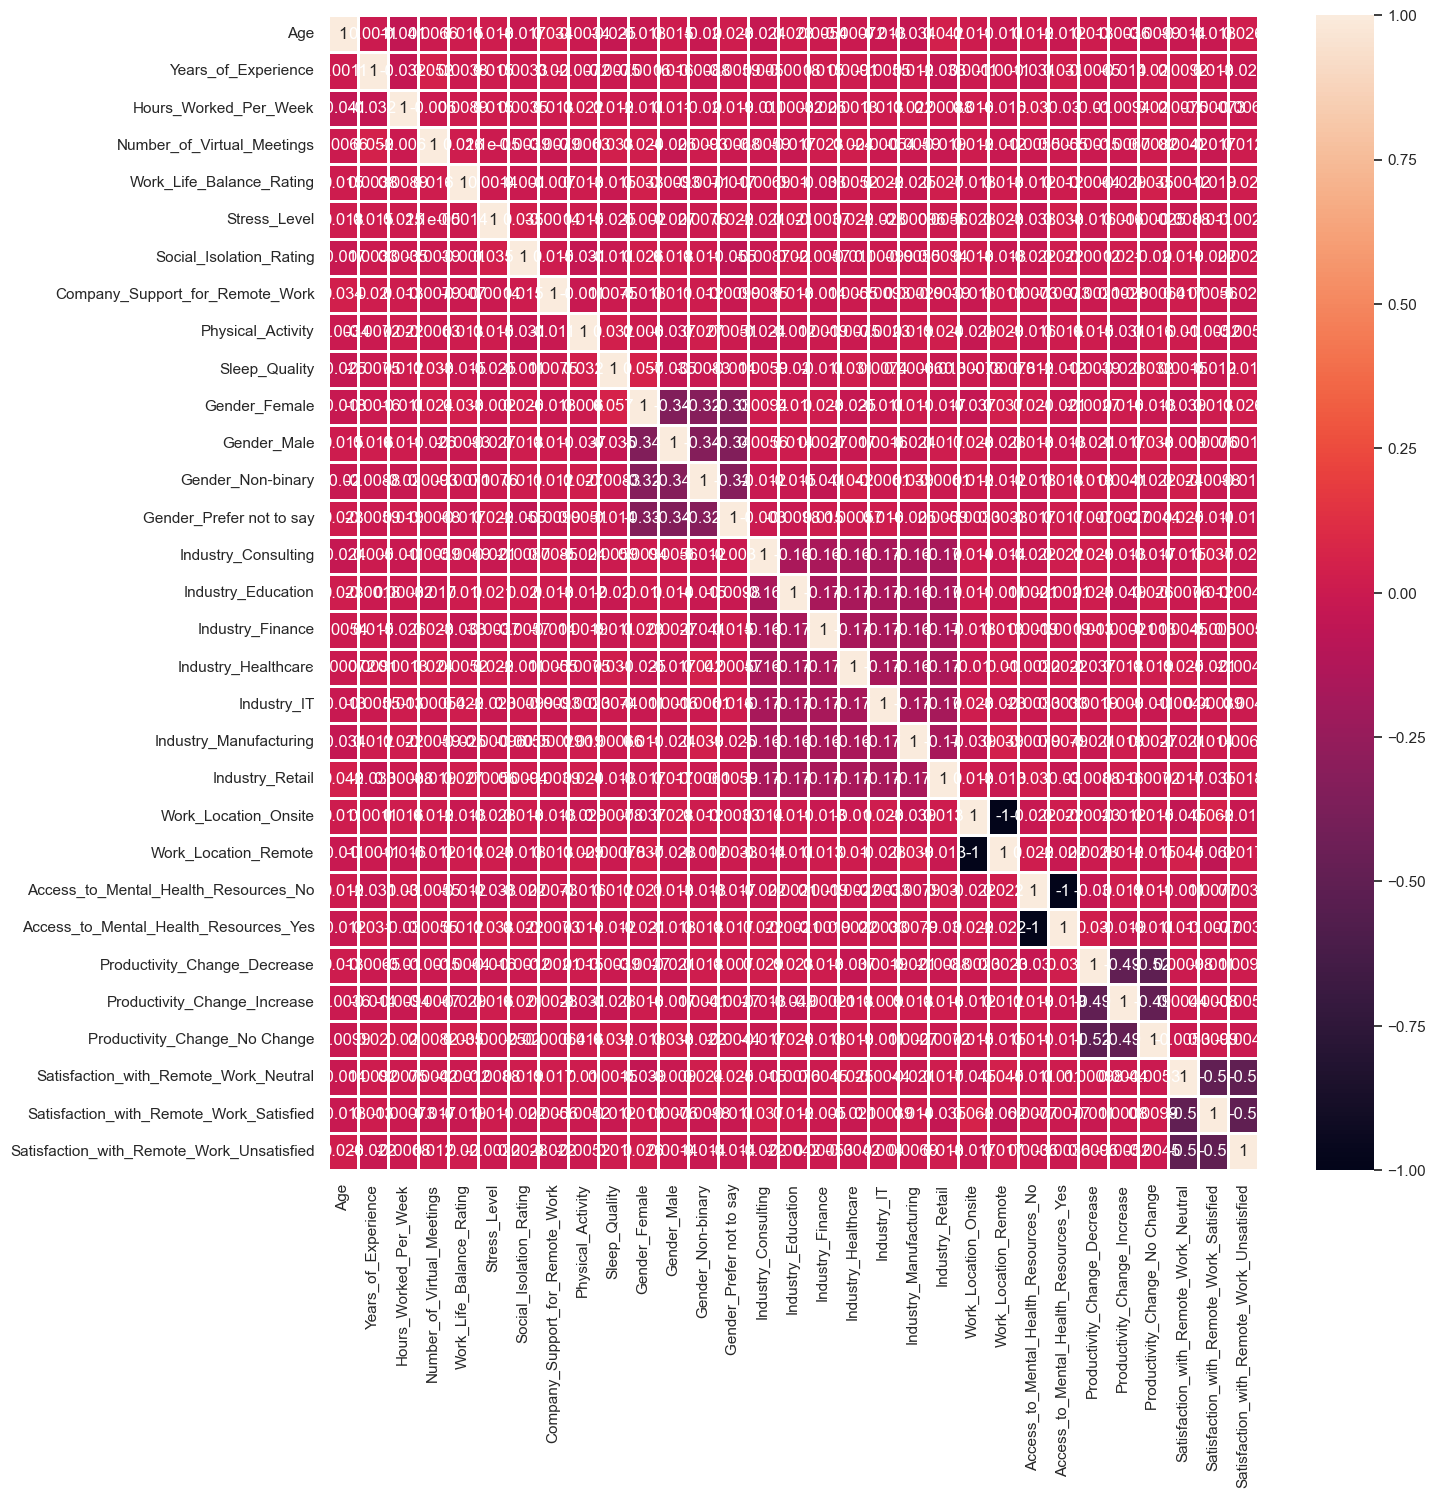

In [247]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_encoded.corr(), linewidths=1, annot=True)

In [255]:
np.abs(df_encoded.corr()['Stress_Level']).sort_values(ascending=False).head(3)

Stress_Level                             1.000000
Access_to_Mental_Health_Resources_No     0.038023
Access_to_Mental_Health_Resources_Yes    0.038023
Name: Stress_Level, dtype: float64

#### **Uncovering Connections: Stress Levels and Access to Mental Health Resources**
**The correlation analysis reveals that the relationship between stress levels and other variables is predominantly very weak**, with most correlations falling below the commonly accepted threshold of 0.05, which typically indicates no significant correlation. However, a notable exception arises with the variable related to access to mental health resources. **Both "Access_to_Mental_Health_Resources_No" and "Access_to_Mental_Health_Resources_Yes" show the highest correlation with stress levels**, approximately 0.038. While this correlation is still considered very weak, it underscores a noteworthy connection that may warrant further exploration in efforts to understand and address stress levels among employees.

## Conclusion

The analysis indicates that the correlation between stress levels and other factors is mostly weak. With that being said, one key finding from this analysis is the strong inverse correlation between sleep quality and stress levels. My initial hypothesis suggested that **individuals who work from home** would exhibit **better sleep quality** and **lower stress levels** than those working onsite. However, the data analysis did not support the claim. With a **p-value of 0.964**, I found **no statistically significant difference** in sleep quality between remote and onsite employees. This indicates that **work location does not play a meaningful role** in influencing sleep quality.

However, I discovered a **strong inverse relationship** between sleep quality and stress levels, with a **perfect negative correlation of -1**. This finding emphasizes that **improved sleep quality is consistently associated with reduced stress levels**. Thus, while we cannot assert that remote work directly leads to better sleep and lower stress, we can confidently conclude that **enhancing sleep quality could be a crucial strategy** for managing employee stress.